# 0.0 - K Nearest Neighbors

O parâmetro utilizado para treinar o algoritmo **KNN** será o número de vizinhos mais próximos (*int*), `n_neighbors`. O valor padrão é `k=5` segundo a documentação oficial consultada na página:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

# 1.0 - Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics as mt
from matplotlib import pyplot as plt

# 2.0 - Carregando os dados

In [3]:
# Treino
X_train = pd.read_csv('data/train/X_training.csv')
y_train = pd.read_csv('data/train/y_training.csv')

# Validação
X_val = pd.read_csv('data/validation/X_validation.csv')
y_val = pd.read_csv('data/validation/y_validation.csv')

# Teste
X_test = pd.read_csv('data/test/X_test.csv')
y_test = pd.read_csv('data/test/y_test.csv')

# 3.0 - Funções

In [17]:
def metrics(y, y_pred, step, algorithm):
    """
    Calcula várias métricas de avaliação de um modelo de classificação e as retorna em um DataFrame.

    Parâmetros:
    -----------
    y : array-like
        Valores da variável resposta.
    
    y_pred : array-like
        Valores preditos pelo modelo.
    
    step : str
        Etapa do processo de modelagem (ex: 'treino', 'validação', 'teste').
    
    algorithm : str
        Nome do algoritmo usado.

    Retorno:
    --------
    df_metrics : pandas.DataFrame
        DataFrame contendo as métricas calculadas:
        - 'Algorithm': Nome do algoritmo.
        - 'Step': Etapa do processo (treino, validação ou teste).
        - 'Accuracy': Valor da Acurácia.
        - 'Precision': Valor da Precision.
        - 'Recall': Valor da Recall.
        - 'F1-Score': Valor de F1-Score.
    """
    # Calcula as métricas
    # Observação: considerei a classe positiva como sendo '0', 
    # de forma que o argumento de 'pos_label' abaixo é nulo.
    # Por padrão, o sklearn representa a mesma classe como sendo '1'. 
    acuracia  = mt.accuracy_score( y, y_pred )
    precision = mt.precision_score( y, y_pred, pos_label = 0 )
    recall    = mt.recall_score( y, y_pred, pos_label = 0 )
    f1        = mt.f1_score( y, y_pred, pos_label = 0 )

    # Cria o DataFrame com as métricas
    df_metrics = pd.DataFrame({   
        'Algorithm': [algorithm],
        'Step': [step],
        'Accuracy': [np.round(acuracia, 4)],
        'Precision': [np.round(precision, 4)],
        'Recall': [np.round(recall, 4)],
        'F1-Score': [np.round(f1, 4)]
    })
    
    return df_metrics

def exporta_excel(nome_algoritmo):
    """
    Exporta os DataFrames de métricas para arquivos Excel em diferentes pastas.

    Args:
        nome_algoritmo (str): Nome do algoritmo utilizado.

    Returns:
        None
    """
    etapas = ['train', 'validation', 'test']
    df_list = [df_metrics_train, df_metrics_val, df_metrics_test]

    for etapa, df in zip(etapas, df_list):
        df.to_excel(f'metrics/{etapa}/{nome_algoritmo}_{etapa}.xlsx', index=False)

# 4.0 - Ajustando os dados

In [5]:
# Como o atributo 'id' não contribui para o aprendizado do modelo, iremos retirá-lo.
X_train, X_val, X_test = [ df.drop(columns = ['id']) for df in [X_train, X_val, X_test] ]

In [6]:
# renomeia a coluna '0' com o nome original 'satisfaction'
y_train, y_val, y_test = [ df.rename(columns = {'0': 'satisfaction'}) for df in [y_train, y_val, y_test] ]

In [7]:
# transformação do formato DataFrame para Series, essencialmente um array unidimensional
y_train, y_val, y_test = [ df.loc[:, 'satisfaction'] for df in [y_train, y_val, y_test] ]

# 5.0 - Desempenho do modelo

## 5.1 - Dados de treino

In [8]:
# Definição do modelo
# O valor padrão de k segundo a documentação oficial eh 'k' = 5
knn_train = KNeighborsClassifier()

# Treinamento do algoritmo
knn_train.fit(X_train, y_train)

# Predição sobre os dados de treino
y_pred_train = knn_train.predict(X_train)

# Métricas
df_metrics_train = metrics(y_train, y_pred_train, 'Train', 'K-Nearest Neighbors')
df_metrics_train

,Algorithm,Step,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors,Train,0.9476,0.9323,0.9786,0.9549


## 5.2 - Dados de validação

In [9]:
# Definição do modelo
knn_val = KNeighborsClassifier()

# Treinamento do algoritmo
knn_val.fit(X_train, y_train)

# Predição sobre os dados de validação
y_pred_val = knn_val.predict(X_val)

# Métricas
df_metrics_val = metrics(y_val, y_pred_val, 'Validation', 'K-Nearest Neighbors')
df_metrics_val

,Algorithm,Step,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors,Validation,0.9252,0.9096,0.9638,0.9359


## 5.3 - Ajuste fino dos hiperparâmetros (Etapa de *Fine Tuning*)

In [10]:
# array para os valores testados de k (primeiros vizinhos)
k_array = np.arange(3, 30, 2)   

# Criar DataFrame para armazenar resultados
metrics_df = pd.DataFrame(columns=['k', 'accuracy', 'precision', 'recall', 'f1_score'])

for k in k_array:
    # modelo
    knn_classifier = KNeighborsClassifier(n_neighbors = k)

    # treinamento do algoritmo. 
    knn_classifier.fit(X_train, y_train)
    
    # Array de predições 
    y_pred = knn_classifier.predict(X_val)
    
    # Calcular métricas de performance
    acuracia = mt.accuracy_score( y_val, y_pred)
    precision = mt.precision_score( y_val, y_pred, pos_label = 0)
    recall = mt.recall_score( y_val, y_pred, pos_label = 0)
    f1 = mt.f1_score( y_val, y_pred, pos_label = 0)
    
    # Armazenar os resultados em uma nova linha como DataFrame
    new_row = pd.DataFrame({
        'k': [k],
        'accuracy': [acuracia],
        'precision': [precision],
        'recall': [recall],
        'f1_score': [f1]
    })

    # Concatenar a nova linha ao DataFrame existente
    metrics_df = pd.concat([metrics_df, new_row], ignore_index=True)

In [11]:
# DataFrame com os valores das métricas de performance para os valores de k testados
metrics_df

,k,accuracy,precision,recall,f1_score
0,3,0.923517,0.910659,0.959114,0.934259
1,5,0.925223,0.909593,0.963827,0.935925
2,7,0.925416,0.908179,0.966042,0.936217
3,9,0.926027,0.907446,0.968200,0.936839
4,11,0.926092,0.906806,0.969165,0.936949
5,13,0.926478,0.906822,0.969903,0.937303
6,15,0.926510,0.906482,0.970415,0.937359
7,17,0.925705,0.905410,0.970244,0.936707
8,19,0.925963,0.905622,0.970471,0.936926
9,21,0.925126,0.904462,0.970358,0.936252


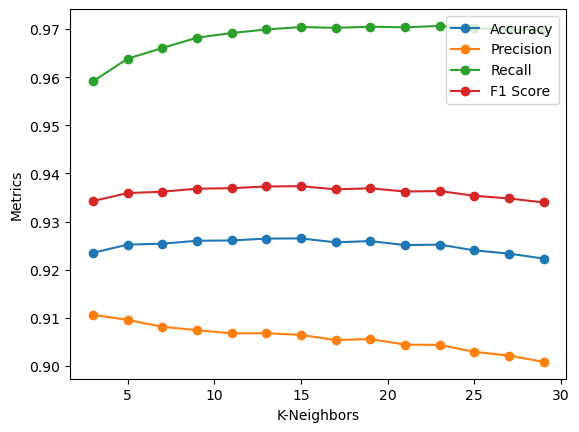

In [12]:
# Gráficos de cada métrica pelos k-vizinhos
plt.plot(k_array, metrics_df['accuracy'], marker="o", label="Accuracy")
plt.plot(k_array, metrics_df['precision'], marker="o", label="Precision")
plt.plot(k_array, metrics_df['recall'], marker="o", label="Recall")
plt.plot(k_array, metrics_df['f1_score'], marker="o", label="F1 Score")
plt.xlabel("K-Neighbors")
plt.ylabel("Metrics")
plt.legend();

Como o objetivo principal da pesquisa é identificar os clientes insatisfeitos para tomar ações corretivas, o *recall* é a figura de mérito mais relevante.  
Assim, um alto *recall* garante que a maioria dos clientes insatisfeitos seja corretamente identificada.  
O melhor valor de *k* é aquele que produz o maior valor da métrica de interesse.

In [13]:
metrics_df.sort_values(by='recall', ascending=False).head(1)

,k,accuracy,precision,recall,f1_score
10,23,0.925223,0.904392,0.970642,0.936346


In [14]:
# melhor valor de k
best_k = 23

## 5.4 - Desempenho do modelo para os dados de teste

In [15]:
# Definição do modelo
knn_test = KNeighborsClassifier(n_neighbors = 23)

# Juntar os dados de treino e validação
knn_test.fit( pd.concat( [X_train, X_val] ),
              pd.concat( [y_train, y_val] ) )

# Predições sobre os dados de teste
y_pred_test = knn_test.predict( X_test )

# Métricas
df_metrics_test = metrics(y_test, y_pred_test, 'Test', 'K-Nearest Neighbors')
df_metrics_test

,Algorithm,Step,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors,Test,0.9263,0.9058,0.9694,0.9366


# 6.0 - Gera as planilhas com os resultados

In [18]:
exporta_excel('K_Nearest_Neighbors')